<a href="https://colab.research.google.com/github/tiagopessoalima/ED2/blob/main/Aula_Semana_04_(ED2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Listas Simplesmente Ligadas (Encadeadas)**

São estruturas de dados **lineares** e **dinâmicas** utilizadas para armazenar coleções de elementos. Diferentemente dos *arrays* (ou listas padrão do Python), que armazenam os elementos em posições **contíguas de memória**, as listas ligadas mantêm os dados dispersos na memória, conectados entre si por **referências**. Cada elemento da lista, chamado de **nó** (*node*), possui dois componentes principais:

1. **Valor** armazenado (dado propriamente dito);  
2. **Referência (ou ponteiro)** para o próximo nó da sequência.

Essa organização oferece vantagens importantes, como inserções e remoções mais eficientes — principalmente quando comparadas aos *arrays*, onde a realocação ou movimentação de elementos pode ser custosa em termos de desempenho. Por outro lado, como cada nó precisa armazenar uma referência, as listas ligadas geralmente consomem mais memória do que *arrays*.

## **O Bloco de Construção: O Nó (Node)**


A estrutura fundamental de uma lista ligada é composta por nós, que são unidades responsáveis por armazenar os dados e manter a ligação entre os elementos da lista. A seguir, a definição da classe que representa um nó em uma lista simplesmente ligada:

In [1]:
class No:
    """
    Representa um único nó em uma lista simplesmente encadeada.
    """
    def __init__(self, valor):
        """
        Inicializa um novo nó.

        Parâmetros:
            valor: Dado a ser armazenado no nó.
        """
        self.valor = valor        # Valor armazenado no nó
        self.proximo = None       # Referência para o próximo nó (inicialmente nula)

    def __repr__(self):
        """
        Representação textual do nó.
        """
        return f"No({self.valor})"

    def __eq__(self, outro):
        """
        Compara dois nós com base no valor armazenado.
        """
        if isinstance(outro, No):
            return self.valor == outro.valor
        return False

> A variável `self.proximo` é o que permite o **encadeamento dos nós**. A partir de um nó, é possível navegar sequencialmente pela lista seguindo essa referência — até que ela aponte para `None`, indicando o fim da estrutura.

### **Exemplo de Criação e Encadeamento de Nós**

Abaixo, criamos três nós manualmente e fazemos o encadeamento entre eles, simulando uma lista simples com três elementos.


In [2]:
# Criando três nós
n1 = No("A")
n2 = No("B")
n3 = No("C")

# Encadeando manualmente
n1.proximo = n2
n2.proximo = n3

### **Imprimindo os Nós Individualmente**


In [3]:
print(n1)                  # No(A)
print(n1.proximo)          # No(B)
print(n1.proximo.proximo)  # No(C)
print(n1.proximo.proximo.proximo)  # None (fim da lista)

No(A)
No(B)
No(C)
None


> A navegação continua até que a referência aponte para `None`, o que indica que atingimos o final da lista.


## **Visualização Conceitual**

Abaixo, temos uma representação esquemática da estrutura construída com os três nós. Cada nó contém um valor e uma referência para o próximo nó da sequência. Esse encadeamento é o que permite que a lista seja percorrida dinamicamente, sem a necessidade de elementos estarem em posições contíguas na memória.

```
n1        n2        n3
┌──────┐  ┌──────┐  ┌──────┐
│ "A"  │→ │ "B"  │→ │ "C"  │→ None
└──────┘  └──────┘  └──────┘
```

Cada seta (→) representa a ligação entre os nós, estabelecida pelo atributo `.proximo`. O último nó da lista aponta para `None`, indicando o término da estrutura. Esse modelo permite que operações como inserção e remoção de elementos possam ser realizadas com complexidade reduzida, especialmente no início da lista ou em posições intermediárias, sem a necessidade de deslocamento de dados na memória — ao contrário do que ocorre em *arrays* tradicionais.






## **Classe Lista Ligada**

Após estabelecermos a estrutura fundamental de um nó, avançamos agora para a implementação de uma estrutura de dados abstrata que representa uma lista simplesmente encadeada.Essa estrutura é essencial em contextos onde há necessidade de operações dinâmicas e eficientes de inserção e remoção, principalmente quando não se conhece previamente o número de elementos a serem armazenados ou quando os dados sofrem alterações frequentes durante a execução do programa.

### **Integração com a Sintaxe do Python**

A classe é projetada com princípios de encapsulamento e modularidade, utilizando métodos especiais do Python para se integrar de forma natural com a sintaxe da linguagem. Isso permite que a lista comporta-se como as estruturas de dados nativas do Python:

- Usar `len(lista)` para consultar o número de elementos (via __len__);
- Iterar com for `item in lista` (via __iter__);
- Acessar elementos com `lista[i]` (via __getitem__);
- Modificar elementos com lista[i] = valor (via __setitem__);
- Verificar presença com `valor in lista` (via __contains__);
- Exibir representações legíveis e técnicas (__str__ e __repr__).

### **Implementação**

A seguir, apresentamos a implementação completa da classe `ListaLigada`, com suporte para inserção de elementos tanto no início quanto no final da lista, e com todos os métodos auxiliares para inspeção, iteração e indexação:

In [4]:
class ListaLigada:
    """
    Implementa uma lista simplesmente encadeada.
    """

    def __init__(self):
        """
        Inicializa a lista como vazia.
        """
        self.inicio = None
        self._tamanho = 0

    def limpar(self) -> None:
        """
        Remove todos os elementos da lista.
        """
        # Poderia iterar e quebrar as referências para ajudar o GC,
        # mas reatribuir inicio é suficiente em Python.
        self.inicio = None
        self._tamanho = 0

    def esta_vazia(self) -> bool:
        """
        Verifica se a lista está vazia.
        """
        return self._tamanho == 0

    def no_em(self, posicao: int) -> No:
        """
        Retorna o nó da posição especificada.
        """
        if not 0 <= posicao < self._tamanho:
            raise IndexError("Índice fora do intervalo.")

        no = self.inicio
        for _ in range(posicao):
            no = no.proximo
        return no

    def inserir_no_inicio(self, valor: any) -> None:
        """
        Insere um novo elemento no início da lista.
        """
        novo_no = No(valor)
        novo_no.proximo = self.inicio
        self.inicio = novo_no
        self._tamanho += 1

    def inserir_no_final(self, valor: any) -> None:
        """
        Insere um novo elemento no final da lista.
        """
        novo_no = No(valor)
        if self.esta_vazia():
            self.inicio = novo_no
        else:
            ultimo = self.no_em(self._tamanho - 1)
            ultimo.proximo = novo_no
        self._tamanho += 1

    def inserir_em(self, posicao: int, valor: any) -> None:
        """
        Insere um novo elemento em uma posição específica da lista.
        """
        if not 0 <= posicao <= self._tamanho:
            raise IndexError("Índice fora do intervalo.")

        if posicao == 0:
            self.inserir_no_inicio(valor)
        else:
            anterior = self.no_em(posicao - 1)
            novo_no = No(valor)
            novo_no.proximo = anterior.proximo
            anterior.proximo = novo_no
            self._tamanho += 1

    def remover_do_inicio(self) -> any:
        """
        Remove e retorna o primeiro elemento da lista.
        """
        if self.esta_vazia():
            raise IndexError("A lista está vazia.")

        removido = self.inicio
        self.inicio = removido.proximo
        self._tamanho -= 1
        return removido.valor

    def remover_do_final(self) -> any:
        """
        Remove e retorna o último elemento da lista.
        """
        if self.esta_vazia():
            raise IndexError("A lista está vazia.")

        if self._tamanho == 1:
            return self.remover_do_inicio()

        penultimo = self.no_em(self._tamanho - 2)
        valor = penultimo.proximo.valor
        penultimo.proximo = None
        self._tamanho -= 1
        return valor

    def remover_em(self, posicao: int) -> any:
        """
        Remove e retorna o elemento da posição especificada.
        """
        if not 0 <= posicao < self._tamanho:
            raise IndexError("Índice fora do intervalo.")

        if posicao == 0:
            return self.remover_do_inicio()

        anterior = self.no_em(posicao - 1)
        removido = anterior.proximo
        anterior.proximo = removido.proximo
        self._tamanho -= 1
        return removido.valor

    def posicao_de(self, valor: any) -> int:
        """
        Retorna o índice da primeira ocorrência do valor na lista, ou -1 se não encontrado.
        """
        atual = self.inicio
        pos = 0
        while atual:
            if atual.valor == valor:
                return pos
            atual = atual.proximo
            pos += 1
        return -1

    def __contains__(self, valor: any) -> bool:
        """
        Permite o uso de 'valor in lista'.
        """
        return self.posicao_de(valor) != -1

    def __len__(self) -> int:
        """
        Retorna o número de elementos da lista.
        """
        return self._tamanho

    def __getitem__(self, posicao: int) -> any:
        """
        Permite acessar o valor de um elemento usando colchetes (ex: lista[2]).
        """
        return self.no_em(posicao).valor

    def __setitem__(self, posicao: int, valor: any) -> None:
        """
        Permite modificar o valor de um elemento usando colchetes, como em lista[i] = novo_valor.
        """
        no = self.no_em(posicao)
        no.valor = valor

    def __iter__(self):
        """
        Permite iterar sobre os elementos da lista.
        """
        atual = self.inicio
        while atual:
            yield atual.valor
            atual = atual.proximo

    def __str__(self) -> str:
        """
        Retorna uma representação amigável da lista.
        """
        return " -> ".join(str(valor) for valor in self) + " -> None"

    def __repr__(self) -> str:
        """
        Retorna uma representação técnica da lista.
        """
        return f"ListaLigada(tamanho={self._tamanho})"

#### **Análise de Complexidade**

A classe `ListaLigada` implementa uma lista simplesmente encadeada com operações fundamentais como inserção, remoção, busca e iteração. Cada método tem uma complexidade associada ao seu custo computacional, dependendo do tamanho da lista ($n$). Abaixo, apresentamos uma tabela com as principais operações e suas respectivas complexidades.

| Método                | Finalidade                                                                 | Complexidade |
|-----------------------|---------------------------------------------------------------------------|--------------|
| `__init__`            | Inicializa a lista como vazia                                              | O(1)         |
| `limpar`              | Remove todos os elementos da lista                                         | O(1)         |
| `esta_vazia`          | Verifica se a lista está vazia                                             | O(1)         |
| `__len__`             | Retorna o número de elementos com `len(lista)`                             | O(1)         |
| `__contains__`        | Verifica se um valor está na lista com `valor in lista`                    | O(n)         |
| `__getitem__`         | Acessa um elemento por índice com `lista[i]`                               | O(n)         |
| `__setitem__`         | Modifica um elemento por índice com `lista[i] = valor`                     | O(n)         |
| `__iter__`            | Permite iteração com `for item in lista`                                   | O(n)         |
| `__str__`             | Retorna uma representação legível da lista com `print(lista)`              | O(n)         |
| `__repr__`            | Retorna uma representação técnica para debug e inspeção                    | O(1)         |
| `inserir_no_inicio`   | Insere um novo elemento no início da lista                                 | O(1)         |
| `inserir_no_final`    | Insere um novo elemento no final da lista                                  | O(n)         |
| `inserir_em`          | Insere um novo elemento em uma posição específica                          | O(n)         |
| `remover_do_inicio`   | Remove e retorna o primeiro elemento da lista                              | O(1)         |
| `remover_do_final`    | Remove e retorna o último elemento da lista                                | O(n)         |
| `remover_em`          | Remove e retorna o elemento de uma posição específica                      | O(n)         |
| `no_em`               | Retorna o nó da posição informada (interno; usado por outros métodos)      | O(n)         |

#### **Exemplos de Uso**

A seguir, demonstramos como utilizar os principais métodos da classe `ListaLigada`:

##### **Criando uma Lista Encadeada**


In [5]:
lista = ListaLigada()

##### **Verificando se a Lista Está Vazia**

In [6]:
print(lista.esta_vazia()) # Saída: True

True


##### **Inserindo Elementos no Início**

In [7]:
lista.inserir_no_inicio("C")  # Lista: C -> None
lista.inserir_no_inicio("B")  # Lista: B -> C -> None
lista.inserir_no_inicio("A")  # Lista: A -> B -> C -> None

##### **Inserindo Elementos no Final**

In [8]:
lista.inserir_no_final("D")   # Lista: A -> B -> C -> D -> None
lista.inserir_no_final("E")   # Lista: A -> B -> C -> D -> E -> None

##### **Exibindo a Lista**

In [9]:
print(lista)
# Saída: A -> B -> C -> D -> E -> None

A -> B -> C -> D -> E -> None


##### **Representação da Lista**

In [10]:
lista

ListaLigada(tamanho=5)

##### **Removendo Elementos no Início**

In [11]:
lista.remover_do_inicio()
# Saída: A. Lista: B -> C -> D -> E -> None

'A'

In [12]:
print(lista)

B -> C -> D -> E -> None


##### **Removendo Elementos no Fim**

In [13]:
lista.remover_do_final()
# Saída: E. Lista: B -> C -> D -> None

'E'

In [14]:
print(lista)

B -> C -> D -> None


##### **Tamanho da Lista**

In [15]:
print(len(lista))
# Saída: 3

3


##### **Acessando Elemento pelo Índice**

In [16]:
print(lista[2])
# Saída: D

D


##### **Iterando Sobre os Elementos**


In [17]:
for valor in lista:
    print(valor, end=" | ")
# Saída: B | C | D |

B | C | D | 

##### **Verificando se um Elemento Está na Lista (Usando `in`)**


In [18]:
print("C" in lista)
# Saída: True

print("Z" in lista)
# Saída: False

True
False


## **Benchmark: Lista Encadeada vs Lista Nativa do Python**

Este teste compara o desempenho da operação de inserção no início entre duas estruturas: a lista encadeada implementada manualmente e a lista nativa do Python (`list`). A inserção no início de uma `list` é **O(n)**, pois requer o deslocamento dos elementos. Já na lista encadeada, é **O(1)**, com simples atualização de ponteiros. A análise mede o tempo médio de execução para diferentes tamanhos de entrada (`10¹` a `10⁵`), repetindo cada teste 30 vezes. Os dados são apresentados em gráfico log-log, evidenciando o crescimento do custo conforme o tamanho aumenta. Essa comparação destaca como a escolha da estrutura impacta diretamente a performance das operações.

Testando inserção de 10 elementos (média de 30 execuções)...
  Lista Ligada: 0.000006s | List (Python): 0.000002s
Testando inserção de 100 elementos (média de 30 execuções)...
  Lista Ligada: 0.000055s | List (Python): 0.000013s
Testando inserção de 1000 elementos (média de 30 execuções)...
  Lista Ligada: 0.001464s | List (Python): 0.000607s
Testando inserção de 10000 elementos (média de 30 execuções)...
  Lista Ligada: 0.026129s | List (Python): 0.027222s
Testando inserção de 100000 elementos (média de 30 execuções)...
  Lista Ligada: 0.352865s | List (Python): 1.758724s


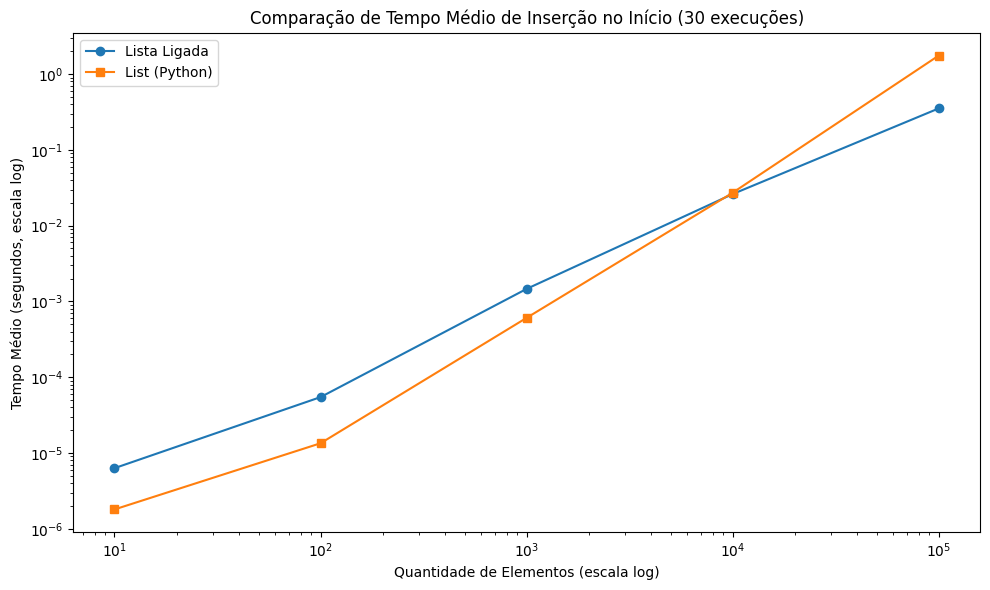

In [19]:
import time
import matplotlib.pyplot as plt

# Função para Testes com Média de Execuções
def calcular_tempo_medio(func, qtd, execucoes=30):
    tempos = []
    for _ in range(execucoes):
        inicio = time.perf_counter()
        func(qtd)
        fim = time.perf_counter()
        tempos.append(fim - inicio)
    return sum(tempos) / execucoes

# Testes Específicos para Cada Estrutura

def teste_lista_ligada(qtd):
    lista = ListaLigada()
    for i in range(qtd):
        lista.inserir_no_inicio(i)

def teste_lista_python(qtd):
    vetor = []
    for i in range(qtd):
        vetor.insert(0, i)  # Inserção no início de lista Python (ineficiente)

# Execução dos Testes

tamanhos = [10**i for i in range(1, 6)]
tempos_ligada = []
tempos_python = []

for tamanho in tamanhos:
    print(f"Testando inserção de {tamanho} elementos (média de 30 execuções)...")

    tempo_ll = calcular_tempo_medio(teste_lista_ligada, tamanho)
    tempo_py = calcular_tempo_medio(teste_lista_python, tamanho)

    print(f"  Lista Ligada: {tempo_ll:.6f}s | List (Python): {tempo_py:.6f}s")

    tempos_ligada.append(tempo_ll)
    tempos_python.append(tempo_py)

# Gráfico

plt.figure(figsize=(10, 6))
plt.plot(tamanhos, tempos_ligada, label='Lista Ligada', marker='o')
plt.plot(tamanhos, tempos_python, label='List (Python)', marker='s')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Quantidade de Elementos (escala log)')
plt.ylabel('Tempo Médio (segundos, escala log)')
plt.title('Comparação de Tempo Médio de Inserção no Início (30 execuções)')
plt.legend()
plt.tight_layout()
plt.show()

### **Análise de Desempenho: Inserção no Início**

Os testes comparativos entre listas ligadas e listas nativas do Python revelam padrões distintos de desempenho:

#### **Pequenas quantidades de dados**
- Para volumes reduzidos de inserção, as listas nativas tendem a ser mais rápidas.
- Isso ocorre devido à otimização interna do Python e à ausência de sobrecarga com alocação dinâmica de nós.
- O custo adicional de criar objetos e manipular ponteiros em listas ligadas impacta mais quando o volume é pequeno.

#### **Crescimento da escala**
- À medida que a quantidade de inserções aumenta, o custo da operação `insert(0, valor)` em listas nativas cresce proporcionalmente, pois exige o deslocamento de todos os elementos.
- Listas ligadas mantêm complexidade constante para inserção no início, tornando-se mais vantajosas com o aumento do tamanho.

### **Ponto de virada**
- Em determinado ponto, o tempo de inserção da lista ligada se torna inferior ao da lista nativa.
- Esse ponto destaca a vantagem da lista ligada para inserções no início.



## **Exercícios**

**1. Remover Todos os Nós com Valor Repetido:** Implemente um método `remover_repetidos()` que remove todos os nós duplicados, mantendo apenas a primeira ocorrência de cada valor.




In [20]:
# Exemplo:
# Entrada: A → B → A → C → B → D
# Saída:   A → B → C → D

**2. Inverter a Lista:** Crie um método `inverter()` que inverte a ordem dos elementos da lista sem usar estruturas auxiliares (pilhas/filas).

In [21]:
# Entrada: 1 → 2 → 3 → 4
# Saída:   4 → 3 → 2 → 1

**3. Intercalar com Outra Lista:** Implemente intercalar(outra_lista) que recebe outra lista ligada e intercala seus nós com os da lista atual.


In [22]:
# Lista 1: A → C → E
# Lista 2: B → D → F
# Resultado: A → B → C → D → E → F

**4. Remover Nós com Valor Maior que X:** Crie um método `remover_maiores_que(x)` que remove todos os nós com valor maior que `x`.

In [23]:
# Lista: 3 → 7 → 2 → 9 → 1
# x = 5 → Saída: 3 → 2 → 1

**5. Dividir em Duas Metades:** Crie `dividir_em_metades()` que divide a lista ao meio e retorna duas novas listas ligadas.

In [24]:
# Entrada: A → B → C → D → E
# Saída:
# Lista 1: A → B → C
# Lista 2: D → E

**6. Ordenar a Lista:** Implemente `ordenar()` que ordena a lista ligada, utilizando ordenação por inserção ou merge sort.

In [25]:
# Lista original: D → B → A → F → C → E
# ordenar()
# Resultado: A → B → C → D → E → F

**7. Remover Intervalo:** Crie `remover_intervalo(inicio, fim)` que remove todos os nós entre os índices inicio e fim (inclusive).

In [26]:
# Lista: A → B → C → D → E → F
# remover_intervalo(2, 4)
# Resultado: A → B → F

**8. Comparar Igualdade:** Implemente `eh_igual(outra_lista)` que verifica se duas listas possuem os mesmos valores, na mesma ordem.

In [27]:
# Lista 1: A → B → C → D
# Lista 2: A → B → C → D
# eh_igual(lista1, lista2)
# Resultado: True

# Lista 3: A → B → X → D
# eh_igual(lista1, lista3)
# Resultado: False